In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip3 install cloudinary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cloudinary: filename=cloudinary-1.41.0-py3-none-any.whl size=139735 sha256=924901ea356480b5f66f45325bdf5d4d20302d8190e8a5d0d7609083da75e8a1
  Stored in directory: /root/.cache/pip/wheels/4a/55/5f/756f34a12b7e3c2923b8dbe52d02299d23bd91a50948fe0929
Successfully built cloudinary


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 45.6 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
img='/content/shreyash.jpg'

In [ ]:
img="/content/H+N.jpg"

In [ ]:
img='/content/abhinav bike.jpg'

In [ ]:
img='/content/abhinav.jpg'

In [ ]:
img='/content/riding-without-helmet-road-safety.jpg'

In [ ]:
img='/content/N+WH1.jpg'

In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/best_11n.pt source=/content/N+WH1.jpg

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/N+WH1.jpg: 640x480 1 bike, 1 numberplate, 1 withouthelmet, 277.0ms
Speed: 4.6ms preprocess, 277.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO  # Assuming you're using YOLO from Ultralytics

# Load the YOLOv11 model
model = YOLO('/content/best_11n.pt')  # Path to your trained model

# Define class IDs or names for violations
helmet_class_id = 0  # Assuming 0 is the class ID for helmet detection
triple_riding_class_id = 1  # Assuming 1 is the class ID for triple riding detection
number_plate_class_id = 2  # Assuming 2 is the class ID for number plate recognition

# Test image path
image_path = img

# Run prediction on the image
results = model.predict(source=image_path, conf=0.25, save=True)  # Use save=True to store the output image

# Initialize a Boolean to track if a violation was detected
violation_detected = False

# Check if any violation-related classes were detected
for result in results:
    for detection in result.boxes:
        class_id = detection.cls.item()  # Get the class ID
        # Check if the detected class is a violation class
        if class_id in [helmet_class_id, triple_riding_class_id, number_plate_class_id]:
            violation_detected = True
            break  # Exit once a violation is found

# Print or return the result
if violation_detected:
    print("Violation detected!")
else:
    print("No violation detected.")



image 1/1 /content/N+WH1.jpg: 640x480 1 bike, 1 numberplate, 1 withouthelmet, 323.7ms
Speed: 15.2ms preprocess, 323.7ms inference, 31.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
Violation detected!


In [ ]:
import cloudinary
import cloudinary.uploader
from cloudinary.utils import cloudinary_url

# Configuration
cloudinary.config(
    cloud_name = "ddn1hxi8k",
    api_key = "989845326942743",
    api_secret = "c1RKKvegSn4xQeE590GsOHkK1mc", # Click 'View API Keys' above to copy your API secret
    secure=True
)

# Upload an image
upload_result = cloudinary.uploader.upload(img,
                                           public_id="plate1")
print(upload_result["secure_url"])

# Optimize delivery by resizing and applying auto-format and auto-quality
optimize_url, _ = cloudinary_url("plate1", fetch_format="auto", quality="auto")
print(optimize_url)

# Transform the image: auto-crop to square aspect_ratio
auto_crop_url, _ = cloudinary_url("plate1", width=500, height=500, crop="auto", gravity="auto")
print(auto_crop_url)

imgUrl=upload_result["secure_url"]

https://res.cloudinary.com/ddn1hxi8k/image/upload/v1729232415/plate1.jpg
https://res.cloudinary.com/ddn1hxi8k/image/upload/f_auto,q_auto/plate1
https://res.cloudinary.com/ddn1hxi8k/image/upload/c_auto,g_auto,h_500,w_500/plate1


In [ ]:
!pip install requests

In [ ]:
import matplotlib.pyplot as plt
import cv2

def display_image(image_path):
    # Load the image from the provided file path
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage:

In [ ]:
import requests

url = "https://license-plate-from-image.p.rapidapi.com/PlateRecognizerLambda"

# payload = { "url": "https://i.ytimg.com/vi/WPXs6vNiSb4/maxresdefault.jpg" }
# payload = { "url": "https://i.ibb.co/fXYkLGx/numberplate.jpg" }
payload = { "url": imgUrl }

headers = {
	"x-rapidapi-key": "d4070b7abamshfa8e93ff9d201cfp1b14eajsn8278e562f924",
	"x-rapidapi-host": "license-plate-from-image.p.rapidapi.com",
	"Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

print(response.json())
data = response.json()

{'processing_time': 100.358, 'results': [{'box': {'xmin': 354, 'ymin': 898, 'xmax': 494, 'ymax': 976}, 'plate': 'mh12hg6760', 'region': {'code': 'in', 'score': 0.369}, 'score': 0.877, 'candidates': [{'score': 0.877, 'plate': 'mh12hg6760'}, {'score': 0.869, 'plate': 'mh1hg6760'}, {'score': 0.809, 'plate': 'h12hg6760'}, {'score': 0.801, 'plate': 'h1hg6760'}, {'score': 0.796, 'plate': 'mh2hg6760'}, {'score': 0.792, 'plate': 'mhi2hg6760'}, {'score': 0.787, 'plate': 'mhhg6760'}, {'score': 0.786, 'plate': 'm12hg6760'}, {'score': 0.784, 'plate': 'mhihg6760'}, {'score': 0.782, 'plate': 'mh12hg676o'}], 'dscore': 0.889, 'vehicle': {'score': 0.335, 'type': 'Motorcycle', 'box': {'xmin': 246, 'ymin': 671, 'xmax': 588, 'ymax': 1216}}}], 'filename': '0857_XYAcJ_71651d0c-bfbe-4dea-9933-1da350954235.jpg', 'version': 1, 'camera_id': None, 'timestamp': '2024-11-27T08:57:12.815175Z', 'image_width': 960, 'image_height': 1280}


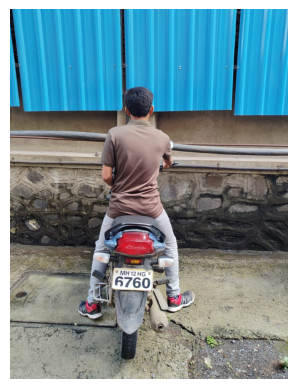

Number Plate : mh12hg6760


In [ ]:
display_image(img)
plate_number = data['results'][0]['plate']
print('Number Plate :',plate_number)

In [ ]:
# plate_number="MH-12-XY-1234"

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from datetime import datetime

# Setup port number and server name
smtp_port = 587                 # Standard secure SMTP port
smtp_server = "smtp.gmail.com"  # Google SMTP Server

# Set up the email details
email_from = "SamplesTrafficPolice@gmail.com"

# Define the app password (use an app password for better security)
pswd = "zsgm jebk xuyc fpqz"  # Replace with your generated app password

# Store violator details in a dictionary
violator_data = {
    "mh12hg6760": {"email": "abhinavtodmal121@gmail.com", "name": "Abhinav Todmal"},
    "MH-12-XY-1234": {"email": "shimpirohit02@gmail.com", "name": "Rohit Shimpi"},
    # Add more number plates and corresponding violator data here
}

# Function to send email
def send_email(violator_details, number_plate):
    email = violator_details["email"]
    name = violator_details["name"]
    location = "Pune, Maharashtra"  # Example location
    violation_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")  # Capture current time

    # Email subject and body
    subject = f"Traffic Violation Alert: Action Required - Vehicle No: {number_plate}"

    body = f"""
    Dear {name},

    This is to inform you that your vehicle with the number plate {number_plate} has been detected for a traffic violation.

    Violation Details:
    - Date and Time: {violation_time}
    - Location: {location}

    Kindly note that this is a serious offense. If this activity was unauthorized or you believe it to be an error, please contact us immediately to dispute this notice.

    Next Steps:
    - If you acknowledge the violation, you may proceed to settle the fine via the provided government portal.
    - If you have questions, you may reach out to our traffic department with the details of this notice.

    Please ensure that any further violations are avoided to maintain safety on the road.

    Thank you for your cooperation.

    Sincerely,
    Maharashtra Traffic Control Department
    """

    # Create MIME object to define parts of the email
    msg = MIMEMultipart()
    msg['From'] = email_from
    msg['To'] = email
    msg['Subject'] = subject

    # Attach the body of the message
    msg.attach(MIMEText(body, 'plain'))

    # Convert message to string
    text = msg.as_string()

    # Connect to the server and send email
    print("Connecting to server...")
    try:
        TIE_server = smtplib.SMTP(smtp_server, smtp_port)
        TIE_server.starttls()  # Secure the connection
        TIE_server.login(email_from, pswd)
        print("Successfully connected to server")

        # Send email to violator
        print(f"Sending email to: {name} at {email}...")
        TIE_server.sendmail(email_from, email, text)
        print(f"Email sent to: {name}")
    except smtplib.SMTPAuthenticationError:
        print("SMTP Authentication Error: Please check your email and password.")
    except Exception as e:
        print(f"Failed to send email: {str(e)}")
    finally:
        TIE_server.quit()

# Get the number plate from the user (or provide programmatically)
number_plate_input = plate_number

# Check if the number plate exists in the violator_data dictionary
if number_plate_input in violator_data:
    send_email(violator_data[number_plate_input], number_plate_input)
else:
    print("Number plate not found in the violator database.")

Connecting to server...
Successfully connected to server
Sending email to: Abhinav Todmal at abhinavtodmal121@gmail.com...
Email sent to: Abhinav Todmal
